In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [47]:
df=pd.read_csv('rainfall.csv')
print(df.head())
df

  District  Year     Rain  population  Drought Occur next year
0   Araria  2003  1620.57   2734511.0                        0
1   Araria  2004  1910.16   2734511.0                        0
2   Araria  2005  1312.79   2535678.0                        0
3   Araria  2006  1469.90   2124831.0                        0
4   Araria  2007  1634.80   2678987.0                        0


,District,Year,Rain,population,Drought Occur next year
0,Araria,2003,1620.57,2734511.0,0
1,Araria,2004,1910.16,2734511.0,0
2,Araria,2005,1312.79,2535678.0,0
3,Araria,2006,1469.90,2124831.0,0
4,Araria,2007,1634.80,2678987.0,0
...,...,...,...,...,...
625,Muzaffarpur,2016,1025.85,4761238.0,0
626,Muzaffarpur,2017,1063.06,4761044.0,0
627,Muzaffarpur,2018,907.55,4761238.0,1
628,Muzaffarpur,2019,1290.83,4801062.0,0


In [48]:
drought_counts = df.groupby('Drought Occur next year').size() 
drought_counts

Drought Occur next year
0    487
1    143
dtype: int64

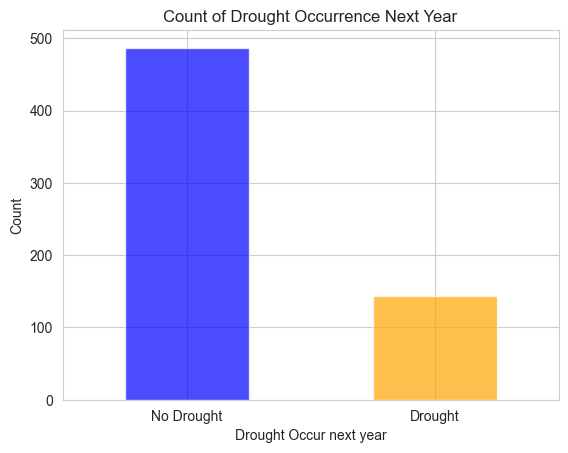

In [49]:

 
# Group by 'Drought Occur next year' and count occurrences 
drought_counts = df.groupby('Drought Occur next year').size() 
 
# Plotting the graph 
drought_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7) 
plt.xlabel('Drought Occur next year') 
plt.ylabel('Count') 
plt.title('Count of Drought Occurrence Next Year') 
plt.xticks(ticks=[0, 1], labels=['No Drought', 'Drought'], rotation=0) 
plt.show()

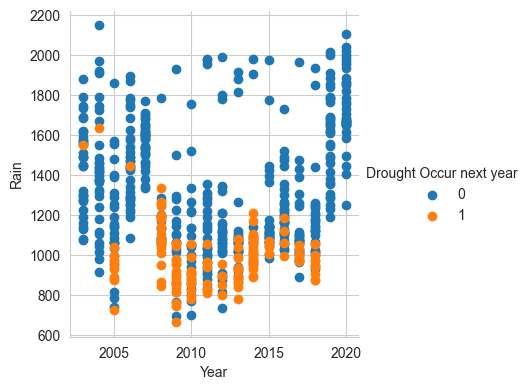

In [50]:
sns.set_style("whitegrid"); 
sns.FacetGrid(df, hue="Drought Occur next year", height=4) \
.map(plt.scatter, "Year", "Rain") \
.add_legend()
plt.show()

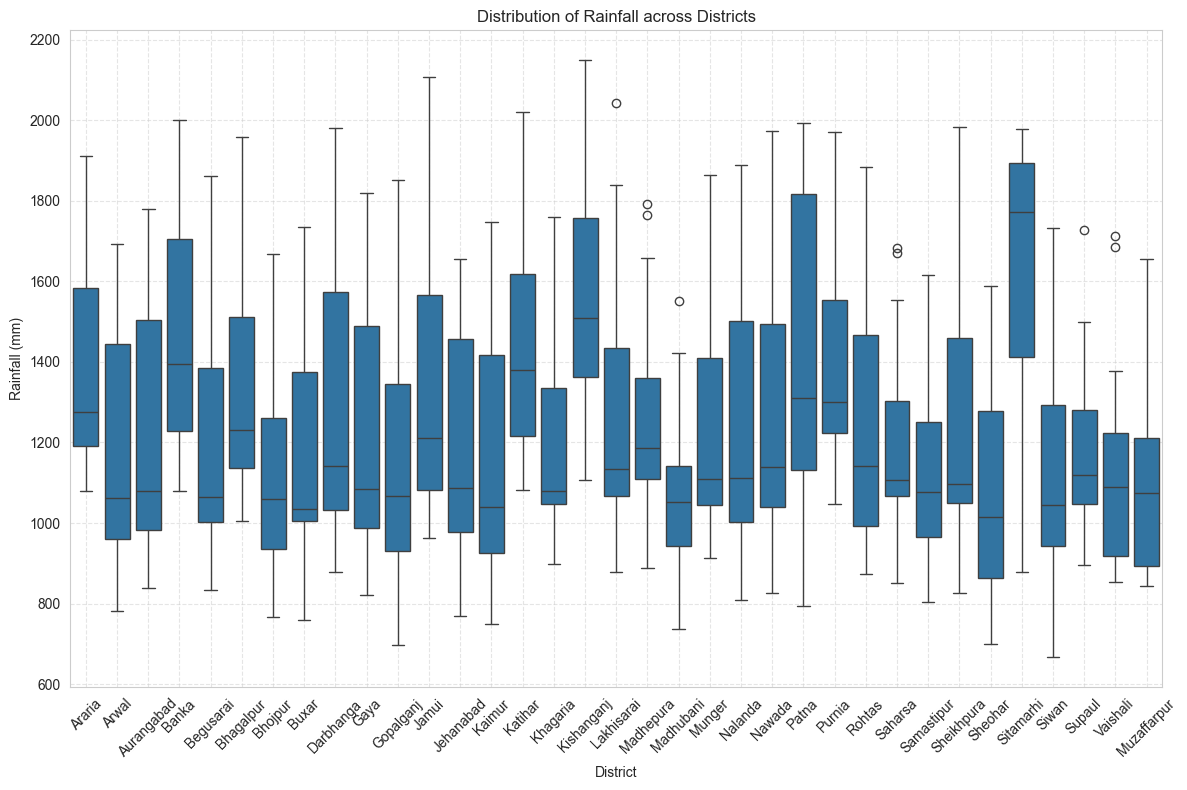

In [51]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='District', y='Rain', data=df)
plt.title('Distribution of Rainfall across Districts')
plt.xlabel('District')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


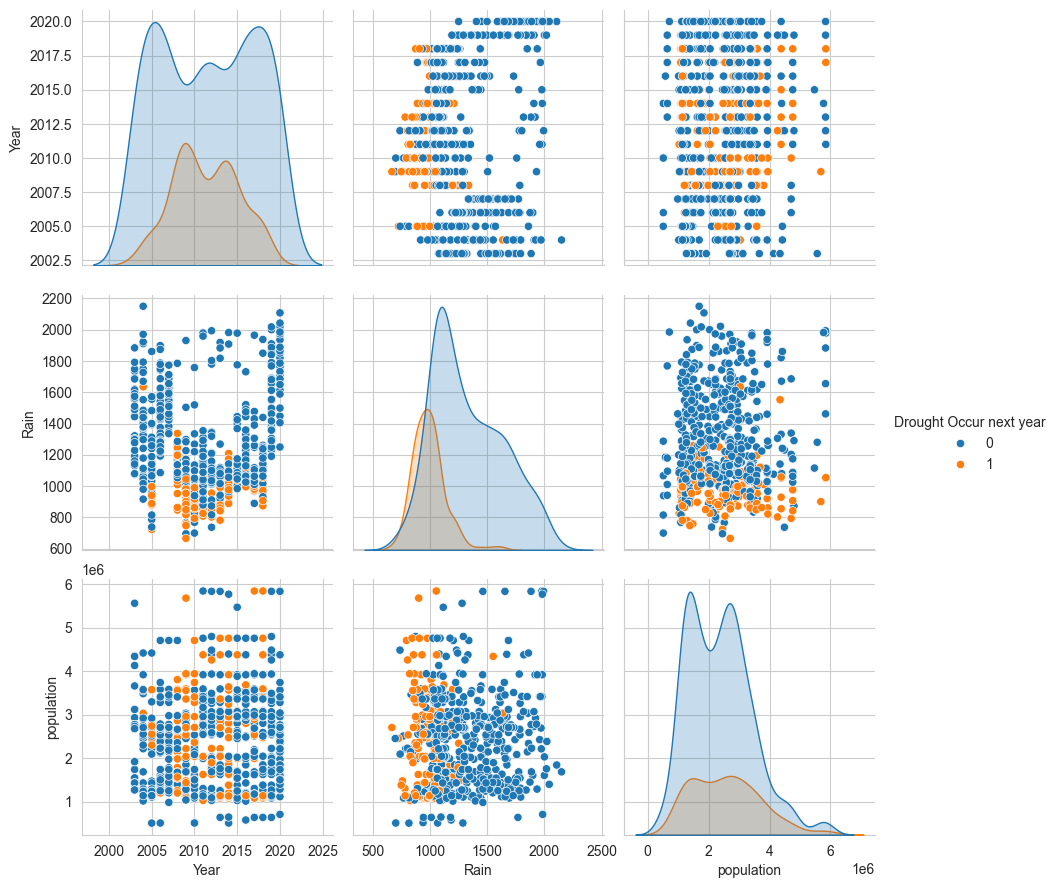

In [52]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="Drought Occur next year", height=3)
plt.show()

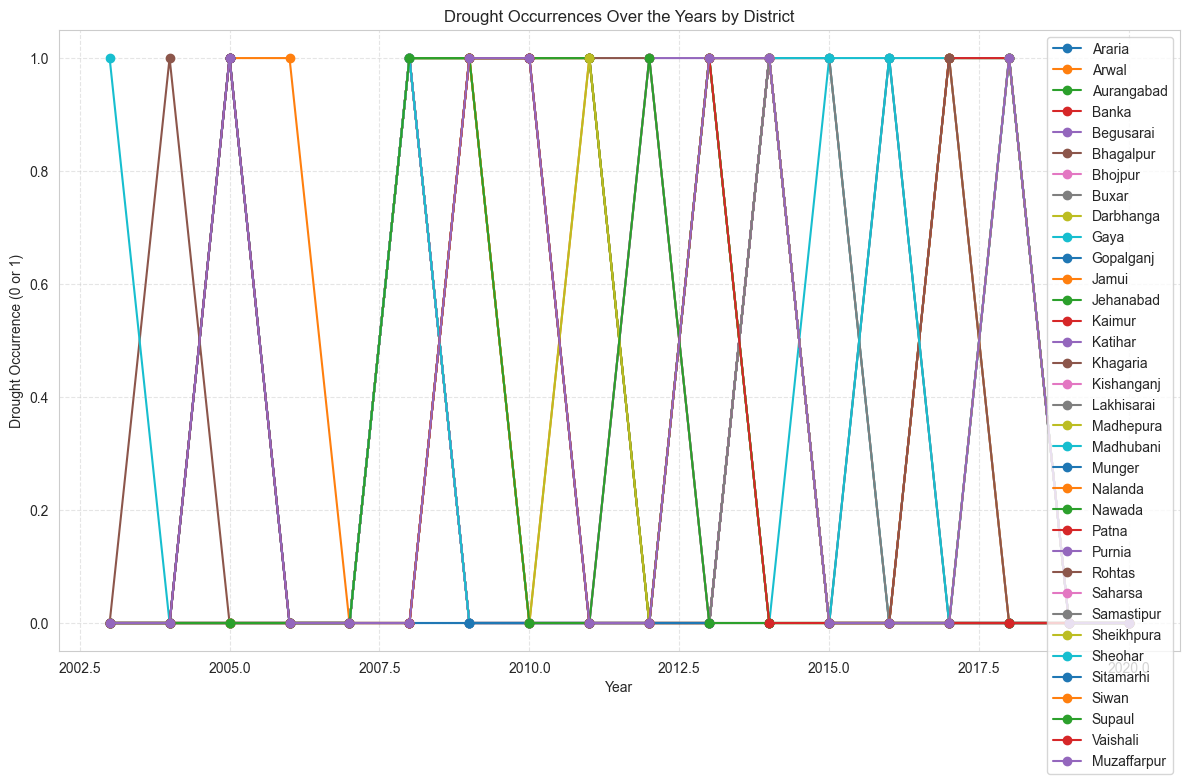

In [53]:
plt.figure(figsize=(12, 8))
districts = df['District'].unique()

# Iterate over each district and plot the line chart
for district in districts:
    data = df[df['District'] == district]
    plt.plot(data['Year'], data['Drought Occur next year'], marker='o', label=district)

plt.title('Drought Occurrences Over the Years by District')
plt.xlabel('Year')                                              
plt.ylabel('Drought Occurrence (0 or 1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


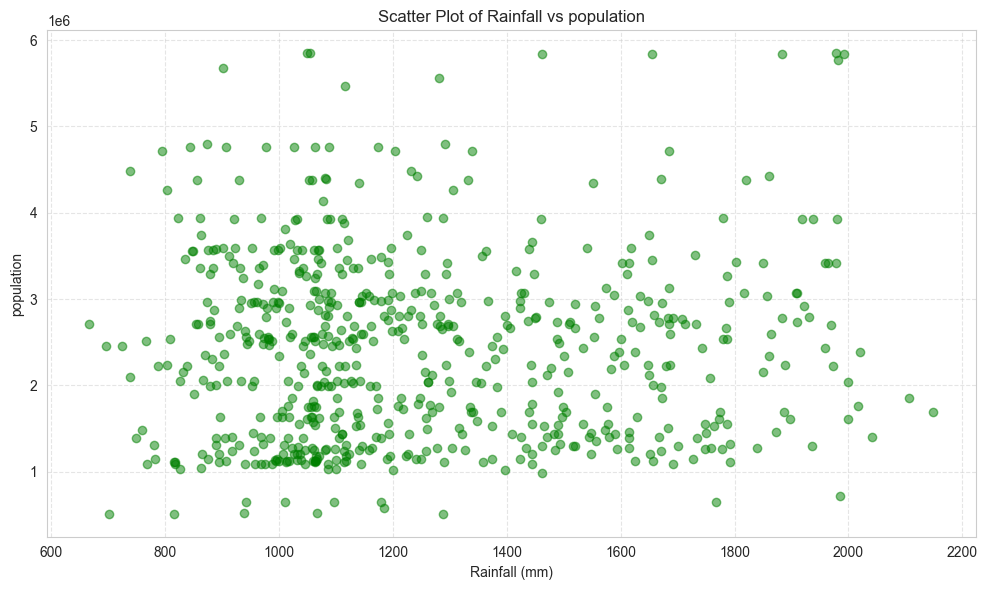

In [54]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Rain'], df['population'], color='green', alpha=0.5)
plt.title('Scatter Plot of Rainfall vs population')
plt.xlabel('Rainfall (mm)')
plt.ylabel('population')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


 Logistic Regression

Accuracy: 0.85
Confusion Matrix:
[[145   8]
 [ 20  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       153
           1       0.67      0.44      0.53        36

    accuracy                           0.85       189
   macro avg       0.77      0.70      0.72       189
weighted avg       0.84      0.85      0.84       189



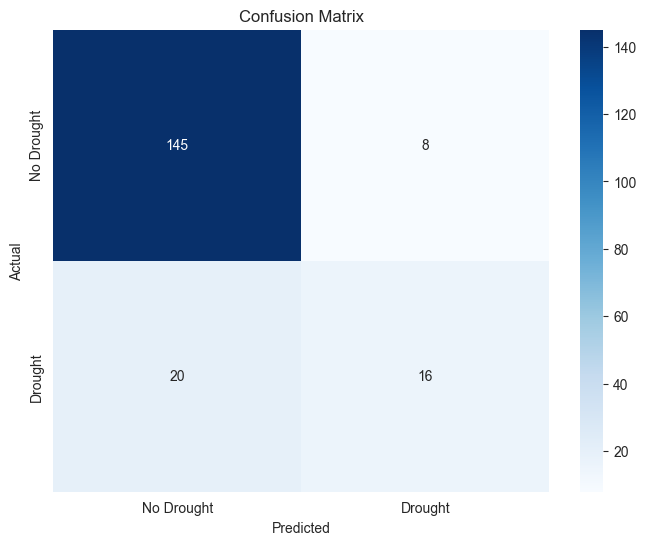

Model saved as 'linear_regression_model.pkl'


In [55]:
X = df[['population','Rain']]
y = df['Drought Occur next year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=74)

# Step 3: Train Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = logreg.predict(X_test)

# Step 5: Evaluate the Model
logreg_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {logreg_accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Step 6: Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Drought', 'Drought'], yticklabels=['No Drought', 'Drought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

print("Model saved as 'linear_regression_model.pkl'")

In [56]:
import numpy as np

# New data point for prediction
new_data = np.array([[2124831,890]])

# Make prediction
predicted_Drought = logreg.predict(new_data)
# Assign labels to the prediction 
label = "Drought" if predicted_Drought == 1 else "No Drought" 

print(f"Predicted the drought : {label}")


Predicted the drought : Drought


DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
X = df[['population','Rain']]
y = df['Drought Occur next year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=74)

Accuracy: 0.78
Confusion Matrix:
[[130  23]
 [ 19  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       153
           1       0.42      0.47      0.45        36

    accuracy                           0.78       189
   macro avg       0.65      0.66      0.65       189
weighted avg       0.79      0.78      0.78       189



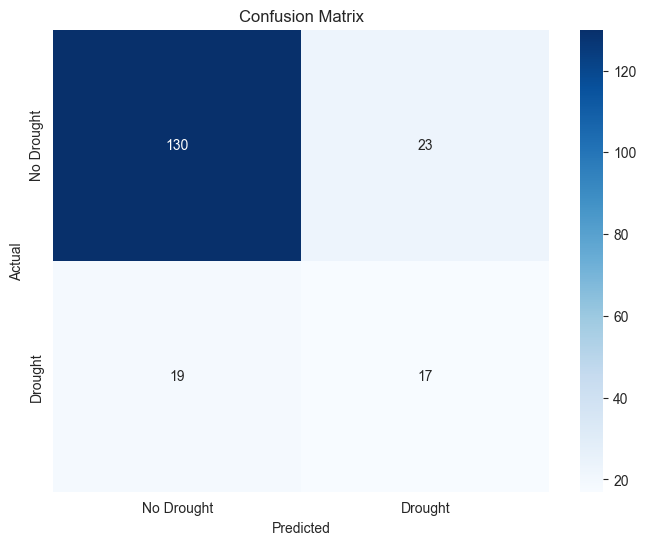

In [59]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = dtree.predict(X_test)

# Step 5: Evaluate the Model
DT_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {DT_accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Step 6: Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Drought', 'Drought'], yticklabels=['No Drought', 'Drought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [60]:
import numpy as np

# New data point for prediction
new_data = np.array([[6124831,890]])

# Make prediction
predicted_Drought = dtree.predict(new_data)
# Assign labels to the prediction 
label = "Drought" if predicted_Drought == 1 else "No Drought" 

print(f"Predicted the drought : {label}")

Predicted the drought : Drought


KNeighborsClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
X = df[['population','Rain']]
y = df['Drought Occur next year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=74)

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.75
Confusion Matrix:
[[132  21]
 [ 26  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       153
           1       0.32      0.28      0.30        36

    accuracy                           0.75       189
   macro avg       0.58      0.57      0.57       189
weighted avg       0.74      0.75      0.74       189



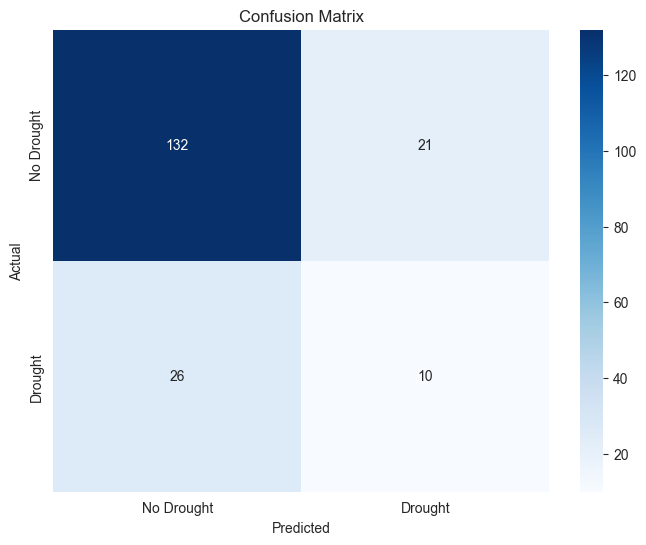

In [64]:
# Step 4: Make Predictions
y_pred = knn.predict(X_test)

# Step 5: Evaluate the Model
Knn_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {Knn_accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Step 6: Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Drought', 'Drought'], yticklabels=['No Drought', 'Drought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [65]:
import numpy as np

# New data point for prediction
new_data = np.array([[6124831,890]])

# Make prediction
predicted_Drought = knn.predict(new_data)
# Assign labels to the prediction 
label = "Drought" if predicted_Drought == 1 else "No Drought" 

print(f"Predicted the drought : {label}")

Predicted the drought : Drought


RandomForestClassifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
X = df[['population','Rain']]
y = df['Drought Occur next year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=74)

Accuracy: 0.86
Confusion Matrix:
[[141  12]
 [ 15  21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       153
           1       0.64      0.58      0.61        36

    accuracy                           0.86       189
   macro avg       0.77      0.75      0.76       189
weighted avg       0.85      0.86      0.85       189



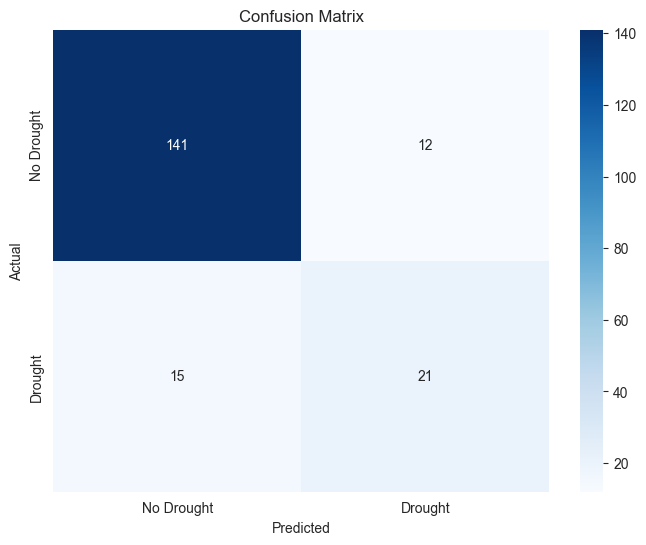

In [68]:
rf = RandomForestClassifier(n_estimators=301, random_state=99)
rf.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = rf.predict(X_test)

# Step 5: Evaluate the Model
RFC_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {RFC_accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Step 6: Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Drought', 'Drought'], yticklabels=['No Drought', 'Drought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [69]:
import numpy as np

# New data point for prediction
new_data = np.array([[124831,890]])

# Make prediction
predicted_Drought = rf.predict(new_data)
# Assign labels to the prediction 
label = "Drought" if predicted_Drought == 1 else "No Drought" 

print(f"Predicted the drought : {label}")

Predicted the drought : No Drought


In [70]:
accuracies = {
    'Random Forest': RFC_accuracy,
    'Logistic Regression': logreg_accuracy,
    'Decision Tree':DT_accuracy,
    ' KNeighborsClassifier':Knn_accuracy
}

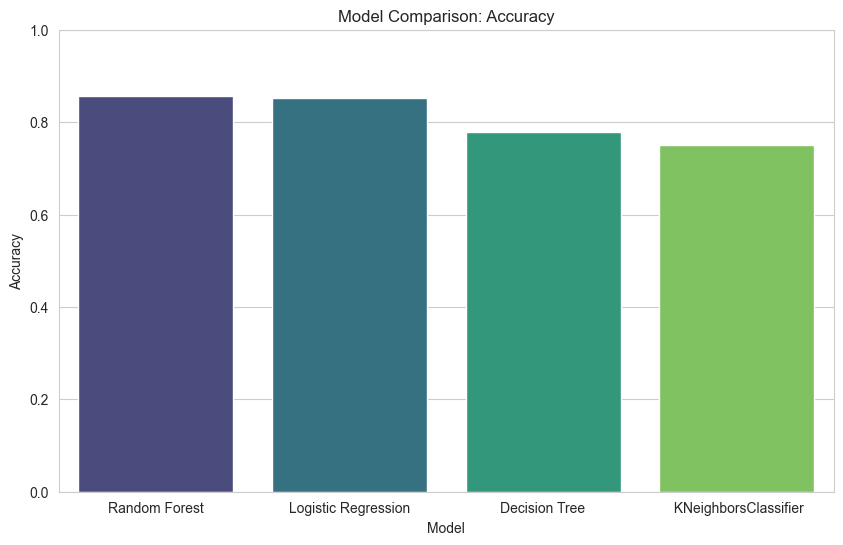

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title('Model Comparison: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()

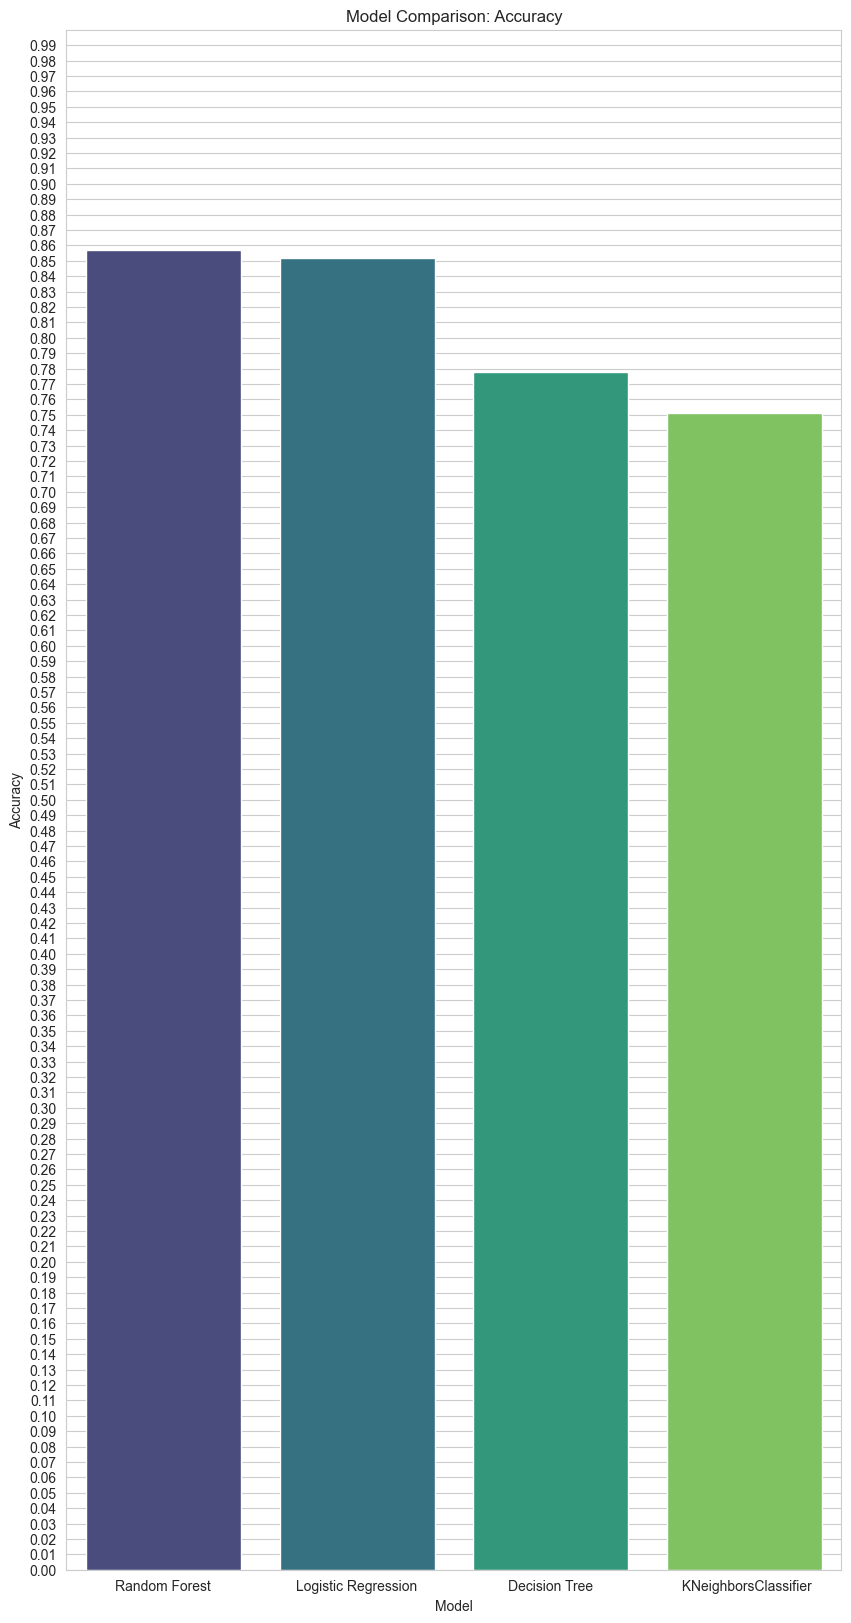

In [72]:
plt.figure(figsize=(10, 20))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title('Model Comparison: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.yticks([i / 100.0 for i in range(0, 100)])  # Set y-axis ticks to show decimal increments
plt.show()